___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to "***Clustering (Customer Segmentation) Project***". This is the last medium project of ***Machine Learning*** course. 

At the end of this project, you will have performed ***Cluster Analysis*** with an ***Unsupervised Learning*** method.

---

In this project, customers are required to be segmented according to the purchasing history obtained from the membership cards of a big mall.

This project is less challenging than other projects. After getting to know the data set quickly, you are expected to perform ***Exploratory Data Analysis***. You should observe the distribution of customers according to different variables, also discover relationships and correlations between variables. Then you will spesify the different variables to use for cluster analysis.

Finally, you should clustered customers using the ***K-Means Clustering*** method, after that label the clusters.

- ***NOTE:*** *This project assumes that you already know the basics of coding in Python. You should also be familiar with the theory behind Cluster Analysis and scikit-learn module as well as Machine Learning before you begin.*

---
---

# #Tasks

Mentoring Prep. and self study#### 

#### 1. Import Libraries, Load Dataset, Exploring Data
- Import Libraries
- Load Dataset
- Explore Data

#### 2. Exploratory Data Analysis (EDA)


#### 3. Cluster Analysis

- Clustering based on Age and Spending Score

    *i. Create a new dataset with two variables of your choice*
    
    *ii. Determine optimal number of clusters*
    
    *iii. Apply K Means*
    
    *iv. Visualizing and Labeling All the Clusters*
    
    
- Clustering based on Annual Income and Spending Score

    *i. Create a new dataset with two variables of your choice*
    
    *ii. Determine optimal number of clusters*
    
    *iii. Apply K Means*
    
    *iv. Visualizing and Labeling All the Clusters*
    
    
- Hierarchical Clustering

    *i. Determine optimal number of clusters using Dendogram*

    *ii. Apply Agglomerative Clustering*

    *iii. Visualizing and Labeling All the Clusters* 

- Conclusion

---
---

## 1. Import Libraries, Load Dataset, Exploring Data

There is a big mall in a specific city that keeps information of its customers who subscribe to a membership card. In the membetrship card they provide following information : gender, age and annula income. The customers use this membership card to make all the purchases in the mall, so tha mall has the purchase history of all subscribed members and according to that they compute the spending score of all customers. You have to segment these customers based on the details given. 

#### Import Libraries

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings('ignore')
#pd.set_option('display.max_rows', 500)
%matplotlib inline

from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)

pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
import plotly.express  as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from scipy.stats import variation

#### Load Dataset

In [74]:
df = pd.read_csv("Mall_Customers.csv")

#### Explore Data

You can rename columns to more usable, if you need.

In [75]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

In [76]:
df.rename(columns={'Annual Income (k$)':'Annual Income', 'Spending Score (1-100)':'Spending Score'}, inplace=True)

In [77]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income', 'Spending Score'], dtype='object')

In [78]:
df.head()

CustomerID  Gender  Age  Annual Income  Spending Score
0           1    Male   19             15              39
1           2    Male   21             15              81
2           3  Female   20             16               6
3           4  Female   23             16              77
4           5  Female   31             17              40

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   CustomerID      200 non-null    int64 
 1   Gender          200 non-null    object
 2   Age             200 non-null    int64 
 3   Annual Income   200 non-null    int64 
 4   Spending Score  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [80]:
df.shape

(200, 5)

In [81]:
df.isnull().any().sum()

0

In [82]:
df.duplicated().sum()

0

In [83]:
df.nunique()

CustomerID        200
Gender              2
Age                51
Annual Income      64
Spending Score     84
dtype: int64

In [84]:
df.describe()

CustomerID         Age  Annual Income  Spending Score
count  200.000000  200.000000     200.000000      200.000000
mean   100.500000   38.850000      60.560000       50.200000
std     57.879185   13.969007      26.264721       25.823522
min      1.000000   18.000000      15.000000        1.000000
25%     50.750000   28.750000      41.500000       34.750000
50%    100.500000   36.000000      61.500000       50.000000
75%    150.250000   49.000000      78.000000       73.000000
max    200.000000   70.000000     137.000000       99.000000

In [85]:
df.drop("CustomerID", inplace=True, axis=1)

---
---

## 2. Exploratory Data Analysis (EDA)

After performing Cluster Analysis, you need to know the data well in order to label the observations correctly. Analyze frequency distributions of features, relationships and correlations between the independent variables and the dependent variable. It is recommended to apply data visualization techniques. Observing breakpoints helps you to internalize the data.





In [86]:
plt.figure(figsize=(16,6))
sns.histplot(data=df, x="Age",bins=100);

In [193]:
plt.figure(figsize=(16,6))
sns.countplot(x ='Age', data = df,palette="RdYlGn")
plt.show();

In [88]:
import random
n = 40
color = ["#" + ''.join([random.choice('0123456789ABCDEF')
                        for j in range(6)]) for i in range(n)]

plt.figure(figsize=(10,8))
explode = [0,0.1]
plt.pie(df['Gender'].value_counts(), explode=explode,autopct='%1.1f%%', colors=color);
plt.legend(labels=['Female','Male']);

In [89]:
plt.figure(figsize=(16,8))
sns.histplot(data=df);

In [90]:
plt.figure(figsize=(16,8))
sns.heatmap(df.corr(),annot=True)
plt.show();

Text(0, 0.5, 'Count')

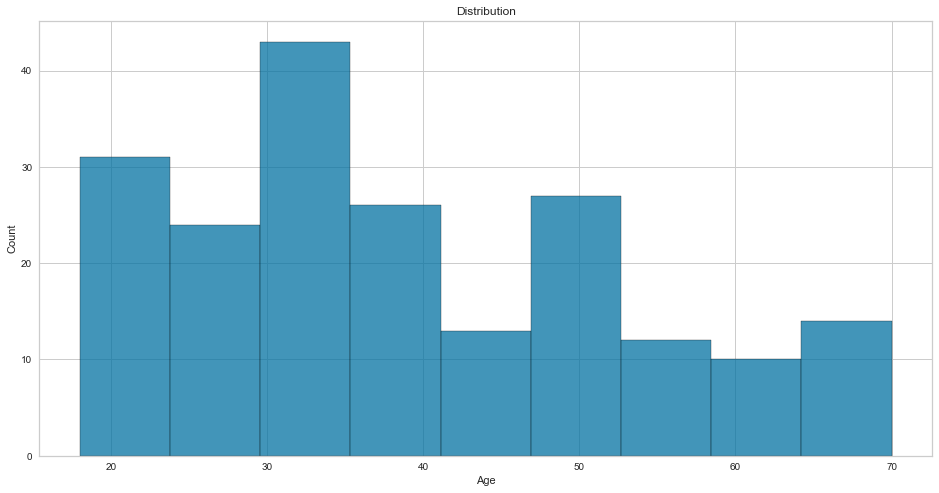

In [91]:
plt.figure(figsize=(16,8))
sns.histplot(x='Age', data=df)
plt.title('Distribution')
plt.xlabel('Age')
plt.ylabel('Count')

In [92]:
plt.figure(figsize=(16,8))
sns.histplot(x ='Annual Income', data=df, color='ORANGE', kde = True)
plt.title('Distribution')
plt.xlabel('Annual Income')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

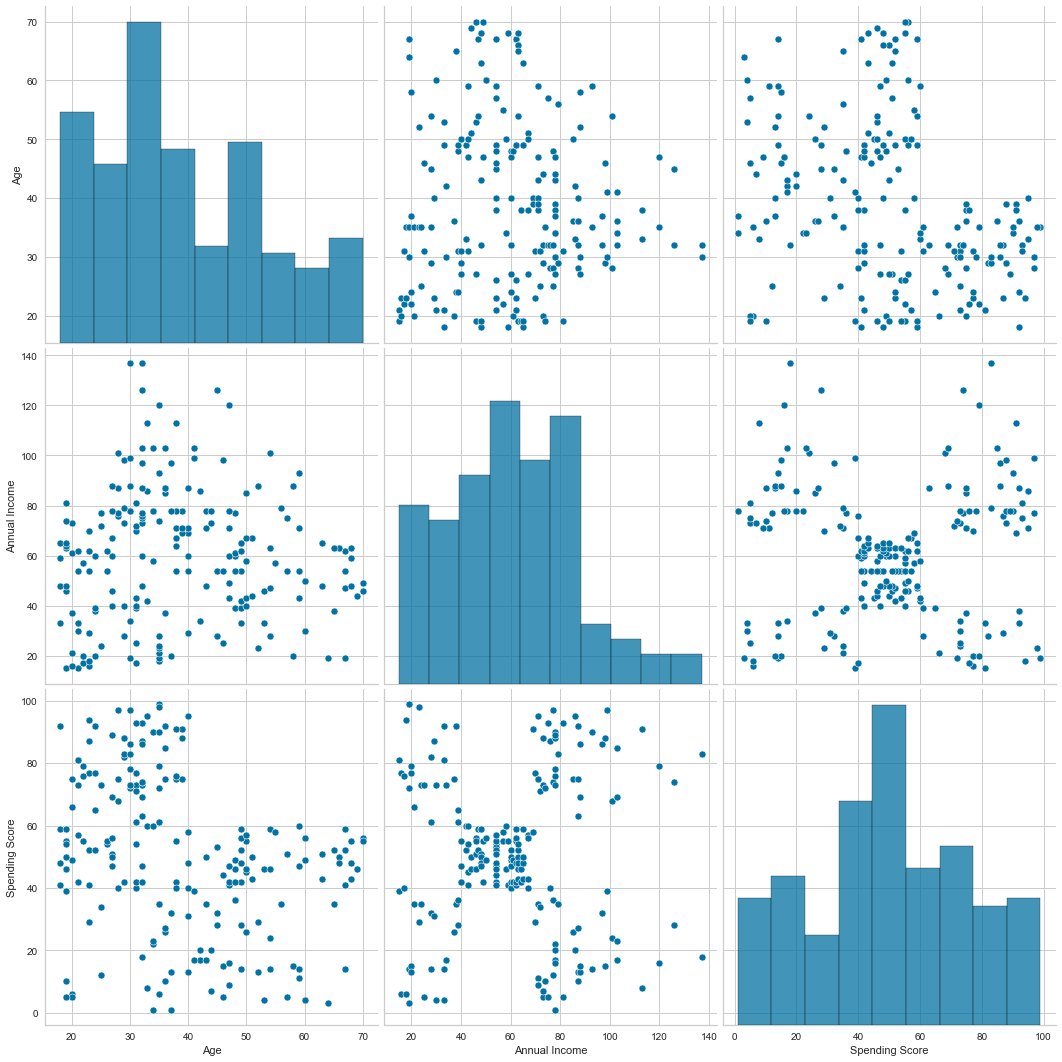

In [93]:
sns.pairplot(df, size=5);

In [94]:
plt.figure(figsize=(16,8))

sns.scatterplot(x ='Annual Income', y='Spending Score', data=df, hue = "Gender",palette="viridis")
plt.show()

## 3. Cluster Analysis

The main purpose of this project is to perform [cluster analysis](https://en.wikipedia.org/wiki/Cluster_analysis#:~:text=Cluster%20analysis%20or%20clustering%20is,in%20other%20groups%20(clusters).) with the [K-Means](https://towardsdatascience.com/understanding-k-means-clustering-in-machine-learning-6a6e67336aa1) algorithm. 

You can perform many [cluster analysis](http://www.stat.columbia.edu/~madigan/W2025/notes/clustering.pdf) using different variables. If you use a maximum of two variables for each cluster analysis, you can identify cluster labels more clearly.

First, the K-Means algorithm expects you to determine the number of clusters (*n_clusters*). You can determine the optimal number of clusters for each cluster analysis in various ways. In this case, you are expected to use the [Elbow Method](https://en.wikipedia.org/wiki/Elbow_method_(clustering).

Finally, different information is obtained in each analysis. Therefore, different labeling should be done as a result of each cluster analysis. 

Labeling example: 

- **Normal Customers**  -- An Average consumer in terms of spending and Annual Income
- **Spender Customers** --  Annual Income is less but spending high, so can also be treated as potential target customer.

### Clustering based on Age and Spending Score

#### *i. Create a new dataset with two variables of your choice*

In [95]:
X = df.drop(columns="Gender")

In [96]:
X.head()

Age  Annual Income  Spending Score
0   19             15              39
1   21             15              81
2   20             16               6
3   23             16              77
4   31             17              40

In [97]:
from pyclustertend import hopkins

In [98]:
hopkins(X, X.shape[0])

0.31176931885150444

In [99]:
X1 = df[["Age","Spending Score"]]

In [100]:
X1.head()

Age  Spending Score
0   19              39
1   21              81
2   20               6
3   23              77
4   31              40

In [101]:
hopkins(X1, X1.shape[0])

0.2834170607008145

In [102]:
X2 = df[["Annual Income","Spending Score"]]

In [103]:
X2.head()

Annual Income  Spending Score
0             15              39
1             15              81
2             16               6
3             16              77
4             17              40

In [104]:
hopkins(X2, X2.shape[0])

0.2857330573054303

#### *ii. Determine optimal number of clusters*

In [105]:
from sklearn.cluster import KMeans

In [106]:
ssd = []

K = range(2,10)                                           

for k in K:
    model = KMeans(n_clusters =k, random_state=42)
    model.fit(X1)                                          
    ssd.append(model.inertia_)

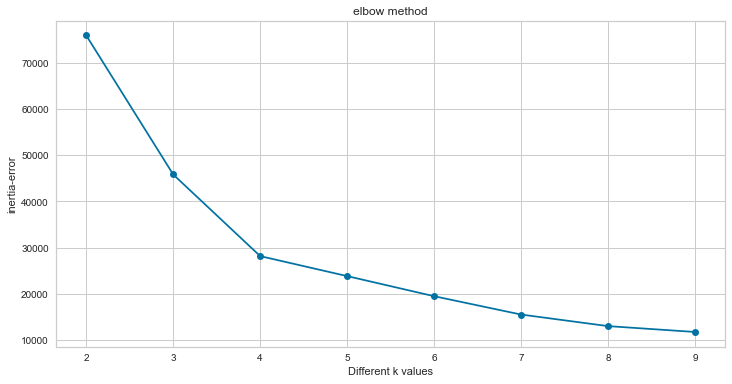

In [107]:
plt.figure(figsize=(12,6))
plt.plot(K, ssd, "bo-")
plt.xlabel("Different k values")
plt.ylabel("inertia-error") 
plt.title("elbow method") 
plt.show()

In [108]:
ssd

[75949.15601023012,
 45840.67661610871,
 28165.583566629342,
 23838.248821646197,
 19483.1179104427,
 15514.193134351033,
 13006.483628851032,
 11738.02029695451]

In [109]:
pd.Series(ssd).diff()

0             NaN
1   -30108.479394
2   -17675.093049
3    -4327.334745
4    -4355.130911
5    -3968.924776
6    -2507.709506
7    -1268.463332
dtype: float64

In [110]:
df_diff =pd.DataFrame(-pd.Series(ssd).diff()).rename(index = lambda x : x+1)
df_diff

0
1           NaN
2  30108.479394
3  17675.093049
4   4327.334745
5   4355.130911
6   3968.924776
7   2507.709506
8   1268.463332

In [111]:
df_diff.plot(kind='bar',figsize=(12,6));

In [112]:
from yellowbrick.cluster import KElbowVisualizer

kmeans = KMeans(random_state=42)
visu = KElbowVisualizer(kmeans, k = (2,10),size=(750,500))
visu.fit(X1)
visu.poof()

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [113]:
from sklearn.metrics import silhouette_score
range_n_clusters = range(2,11)
for num_clusters in range_n_clusters:
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(X1)
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg = silhouette_score(X1, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.4692341232501655
For n_clusters=3, the silhouette score is 0.45300127016521263
For n_clusters=4, the silhouette score is 0.49973941540141753
For n_clusters=5, the silhouette score is 0.43350225495428363
For n_clusters=6, the silhouette score is 0.4376965763059772
For n_clusters=7, the silhouette score is 0.42313509747504796
For n_clusters=8, the silhouette score is 0.43215030177487107
For n_clusters=9, the silhouette score is 0.41485342159923116
For n_clusters=10, the silhouette score is 0.4141899863508767


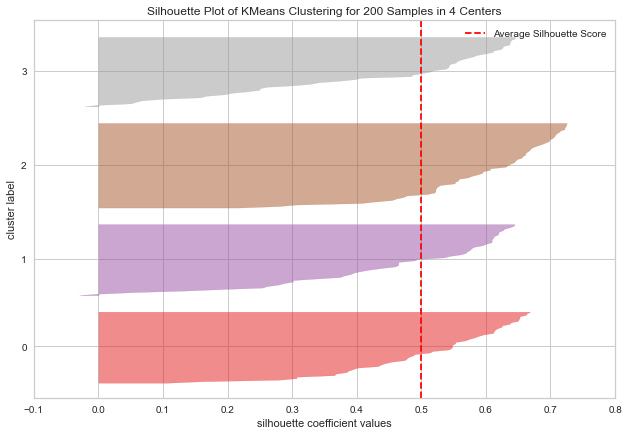

In [114]:
from sklearn.cluster import KMeans

from yellowbrick.cluster import SilhouetteVisualizer

model3 = KMeans(n_clusters=4, random_state=42)
visualizer = SilhouetteVisualizer(model3, size=(750,500))

visualizer.fit(X1)     
visualizer.poof();

### Why silhouette_score is negative?

![image.png](attachment:image.png)

The Silhouette Coefficient is calculated using the mean intra-cluster distance 
( a ) and the mean nearest-cluster distance ( b ) for each sample.
The Silhouette Coefficient for a sample is (b - a) / max(a, b) .

b = 1 
a = ((1+1)**0.5 + (1+1)**0.5)/2  ==> 1.41

silhouette_score = (1-1.41)/1.41 ==> -0.29

#### *iv. Visualizing and Labeling All the Clusters*

In [115]:
kmeans = KMeans(n_clusters=4, random_state=42)

In [116]:
kmeans.fit_predict(X1)

array([3, 2, 1, 2, 3, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 3, 3, 1, 2, 3, 2,
       1, 2, 1, 2, 1, 3, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 0, 3,
       1, 3, 0, 3, 3, 3, 0, 3, 3, 0, 0, 0, 0, 0, 3, 0, 0, 3, 0, 0, 0, 3,
       0, 0, 3, 3, 0, 0, 0, 0, 0, 3, 0, 3, 3, 0, 0, 3, 0, 0, 3, 0, 0, 3,
       3, 0, 0, 3, 0, 3, 3, 3, 0, 3, 0, 3, 3, 0, 0, 3, 0, 3, 0, 0, 0, 0,
       0, 3, 3, 3, 3, 3, 0, 0, 0, 0, 3, 3, 3, 2, 3, 2, 0, 2, 1, 2, 1, 2,
       3, 2, 1, 2, 1, 2, 1, 2, 1, 2, 3, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2, 1, 3, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 3, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2])

In [117]:
X1["cluster_Kmeans"] = kmeans.fit_predict(X1)

In [118]:
X1

Age  Spending Score  cluster_Kmeans
0     19              39               3
1     21              81               2
2     20               6               1
3     23              77               2
4     31              40               3
5     22              76               2
6     35               6               1
7     23              94               2
8     64               3               1
9     30              72               2
10    67              14               1
11    35              99               2
12    58              15               1
13    24              77               2
14    37              13               1
15    22              79               2
16    35              35               3
17    20              66               3
18    52              29               1
19    35              98               2
20    35              35               3
21    25              73               2
22    46               5               1
23    31              73               2
24    54              14               1
25    29              82               2
26    45              32               1
27    35              61               3
28    40              31               1
29    23              87               2
30    60               4               1
31    21              73               2
32    53               4               1
33    18              92               2
34    49              14               1
35    21              81               2
36    42              17               1
37    30              73               2
38    36              26               1
39    20              75               2
40    65              35               0
41    24              92               2
42    48              36               0
43    31              61               3
44    49              28               1
45    24              65               3
46    50              55               0
47    27              47               3
48    29              42               3
49    31              42               3
50    49              52               0
51    33              60               3
52    31              54               3
53    59              60               0
54    50              45               0
55    47              41               0
56    51              50               0
57    69              46               0
58    27              51               3
59    53              46               0
60    70              56               0
61    19              55               3
62    67              52               0
63    54              59               0
64    63              51               0
65    18              59               3
66    43              50               0
67    68              48               0
68    19              59               3
69    32              47               3
70    70              55               0
71    47              42               0
72    60              49               0
73    60              56               0
74    59              47               0
75    26              54               3
76    45              53               0
77    40              48               3
78    23              52               3
79    49              42               0
80    57              51               0
81    38              55               3
82    67              41               0
83    46              44               0
84    21              57               3
85    48              46               0
86    55              58               0
87    22              55               3
88    34              60               3
89    50              46               0
90    68              55               0
91    18              41               3
92    48              49               0
93    40              40               3
94    32              42               3
95    24              52               3
96    47              47    

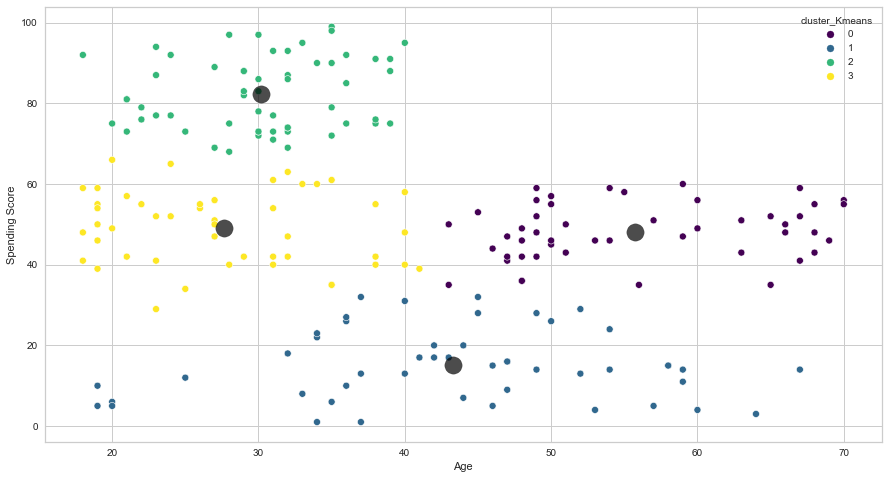

In [119]:
plt.figure(figsize=(15,8))
sns.scatterplot(x='Age', y='Spending Score', hue='cluster_Kmeans', data=X1, palette="viridis")
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=300, alpha=0.7)

### Clustering based on Annual Income and Spending Score

#### *i. Create a new dataset with two variables of your choice*

In [120]:
X2=df[["Annual Income","Spending Score"]]

In [121]:
X2.head()

Annual Income  Spending Score
0             15              39
1             15              81
2             16               6
3             16              77
4             17              40

In [122]:
hopkins(X2,X2.shape[0])

0.2799373529919797

#### *ii. Determine optimal number of clusters*

In [123]:
ssd = []

K = range(2,10)                                          # k icin aralik.

for k in K:
    model = KMeans(n_clusters =k, random_state=42)
    model.fit(X2)                                         # Her yeni k sayisina gore modeli egit.
    ssd.append(model.inertia_)

In [124]:
ssd

[181363.59595959607,
 106348.37306211119,
 73679.78903948837,
 44448.45544793369,
 37233.81451071002,
 30259.657207285458,
 25011.839349156595,
 21850.16528258562]

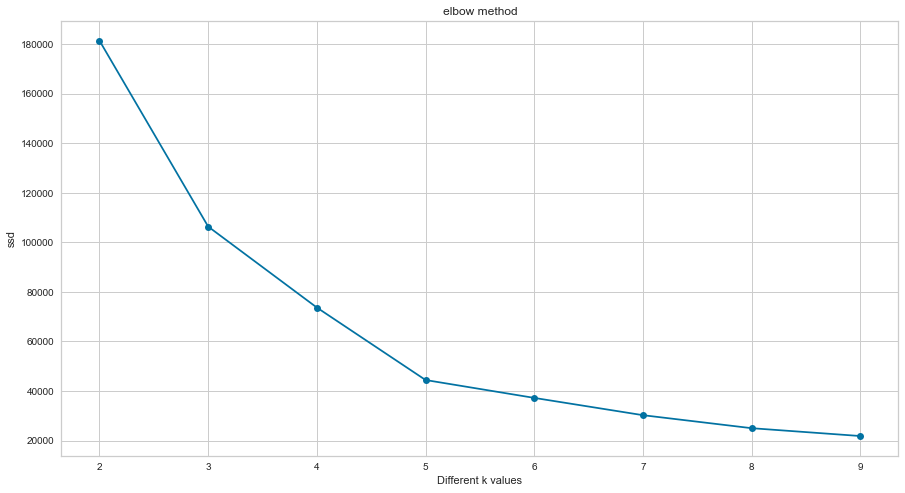

In [125]:
plt.figure(figsize=(15,8))
plt.plot(K, ssd, "bo-")
plt.xlabel("Different k values")
plt.ylabel("ssd") 
plt.title("elbow method") ;

In [126]:
pd.Series(ssd).diff()

0             NaN
1   -75015.222897
2   -32668.584023
3   -29231.333592
4    -7214.640937
5    -6974.157303
6    -5247.817858
7    -3161.674067
dtype: float64

In [127]:
df_diff =pd.DataFrame(-pd.Series(ssd).diff()).rename(index = lambda x : x+1)
df_diff

0
1           NaN
2  75015.222897
3  32668.584023
4  29231.333592
5   7214.640937
6   6974.157303
7   5247.817858
8   3161.674067

In [128]:
df_diff.plot(kind='bar',figsize=(15,8))

<AxesSubplot:>

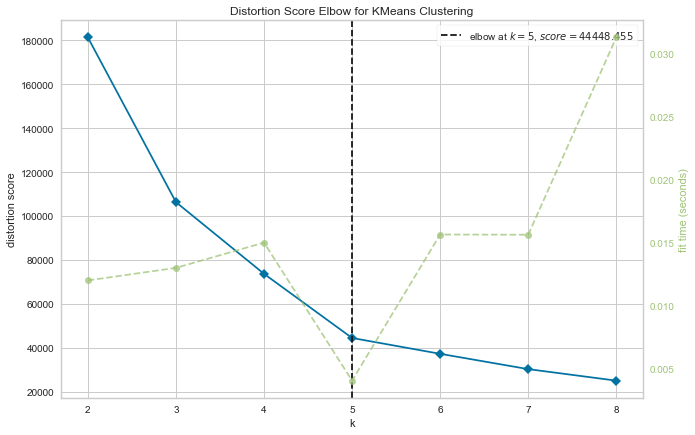

In [129]:
from yellowbrick.cluster import KElbowVisualizer

model_ = KMeans(random_state=42)
visualizer = KElbowVisualizer(model_, k=(2,9), size=(750,500))

visualizer.fit(X2)        # Fit the data to the visualizer
visualizer.show();

In [130]:
range_n_clusters = range(2,9)
for num_clusters in range_n_clusters:
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(X2)
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg = silhouette_score(X2, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.2968969162503008
For n_clusters=3, the silhouette score is 0.46761358158775435
For n_clusters=4, the silhouette score is 0.4931963109249047
For n_clusters=5, the silhouette score is 0.553931997444648
For n_clusters=6, the silhouette score is 0.53976103063432
For n_clusters=7, the silhouette score is 0.5264283703685728
For n_clusters=8, the silhouette score is 0.45827056882053113


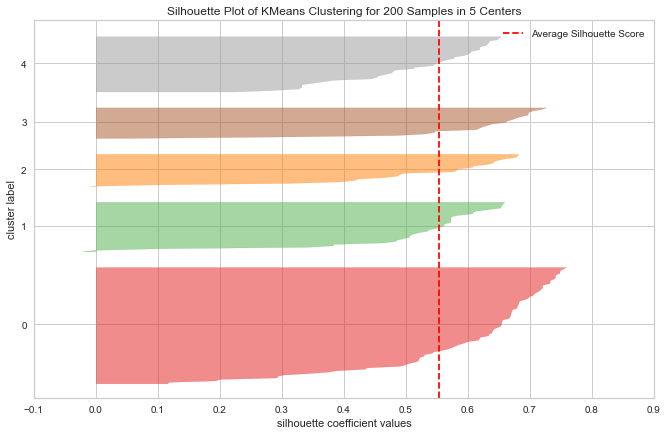

In [131]:
from sklearn.cluster import KMeans

from yellowbrick.cluster import SilhouetteVisualizer

model3 = KMeans(n_clusters=5, random_state=42)
visualizer = SilhouetteVisualizer(model3,size=(800,500))

visualizer.fit(X2)    # Fit the data to the visualizer
visualizer.poof();

#### *iii. Apply K Means*

In [132]:
kmeans2 = KMeans(n_clusters=5, random_state=42)

In [133]:
kmeans2.fit_predict(X2)

array([2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0,
       2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 4, 0, 4, 1, 4, 1, 4,
       0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4])

In [134]:
X2["cluster_Kmeans"] = kmeans.fit_predict(X2)

In [135]:
X2

Annual Income  Spending Score  cluster_Kmeans
0               15              39               3
1               15              81               4
2               16               6               3
3               16              77               4
4               17              40               3
5               17              76               4
6               18               6               3
7               18              94               4
8               19               3               3
9               19              72               4
10              19              14               3
11              19              99               4
12              20              15               3
13              20              77               4
14              20              13               3
15              20              79               4
16              21              35               3
17              21              66               4
18              23              29               3
19              23              98               4
20              24              35               3
21              24              73               4
22              25               5               3
23              25              73               4
24              28              14               3
25              28              82               4
26              28              32               3
27              28              61               4
28              29              31               3
29              29              87               4
30              30               4               3
31              30              73               4
32              33               4               3
33              33              92               4
34              33              14               3
35              33              81               4
36              34              17               3
37              34              73               4
38              37              26               3
39              37              75               4
40              38              35               3
41              38              92               4
42              39              36               1
43              39              61               1
44              39              28               3
45              39              65               1
46              40              55               1
47              40              47               1
48              40              42               1
49              40              42               1
50              42              52               1
51              42              60               1
52              43              54               1
53              43              60               1
54              43              45               1
55              43              41               1
56              44              50               1
57              44              46               1
58              46              51               1
59              46              46               1
60              46              56               1
61              46              55               1
62              47              52               1
63              47              59               1
64              48              51               1
65              48              59               1
66              48              50               1
67              48              48               1
68              48              59               1
69              48              47               1
70              49              55               1
71              49              42               1
72              50              49               1
73              50              56               1
74              54              47               1
75              54              54               1
76              54              53               1
77              54         

#### *iv. Visualizing and Labeling All the Clusters*

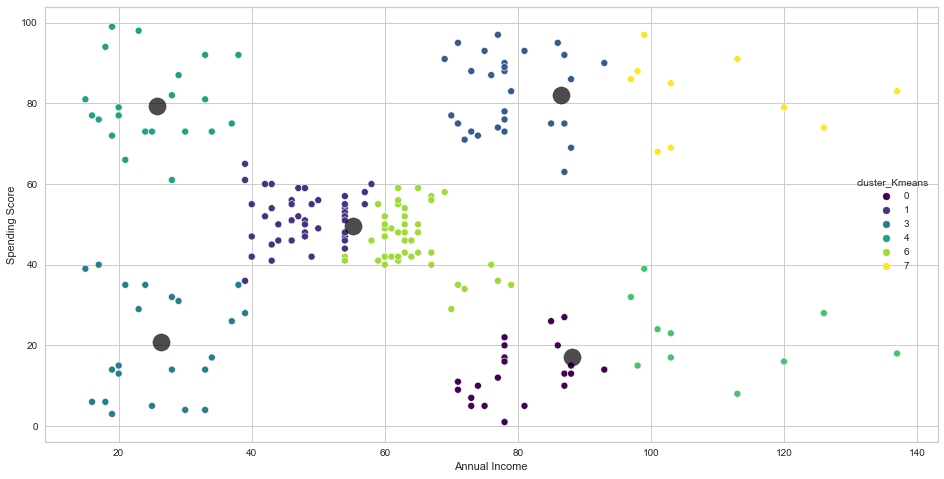

In [136]:
plt.figure(figsize=(16,8))
sns.scatterplot(x='Annual Income', y='Spending Score', hue='cluster_Kmeans', data=X2, palette="viridis")
centers = kmeans2.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=300, alpha=0.7);

### Hierarchical Clustering

### *i. Determine optimal number of clusters using Dendogram*

### Clustering based on Age and Spending Score- x1

In [137]:
from pyclustertend import hopkins

In [138]:
X1.head()

Age  Spending Score  cluster_Kmeans
0   19              39               3
1   21              81               2
2   20               6               1
3   23              77               2
4   31              40               3

In [139]:
hopkins(X1, X1.shape[0])   # Kümelemeye uygun

0.2929739765882115

In [140]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [141]:
hc_ward = linkage(y = X1, method = "ward")  # Datayi hangi kumeye atarsan varyans en en dusuk olacaksa o kumeye at.
hc_complete = linkage(X1, "complete")       # Kumelerdeki en uzak noktalari bul, bunlar icinde en yakin olana atama yap.
hc_average = linkage(X1, "average")         # Datanin kumenin her elemanina olan uzakliklarinin ortalamasini al, en az olan kumeye ata ata.
hc_single = linkage(X1, "single")  

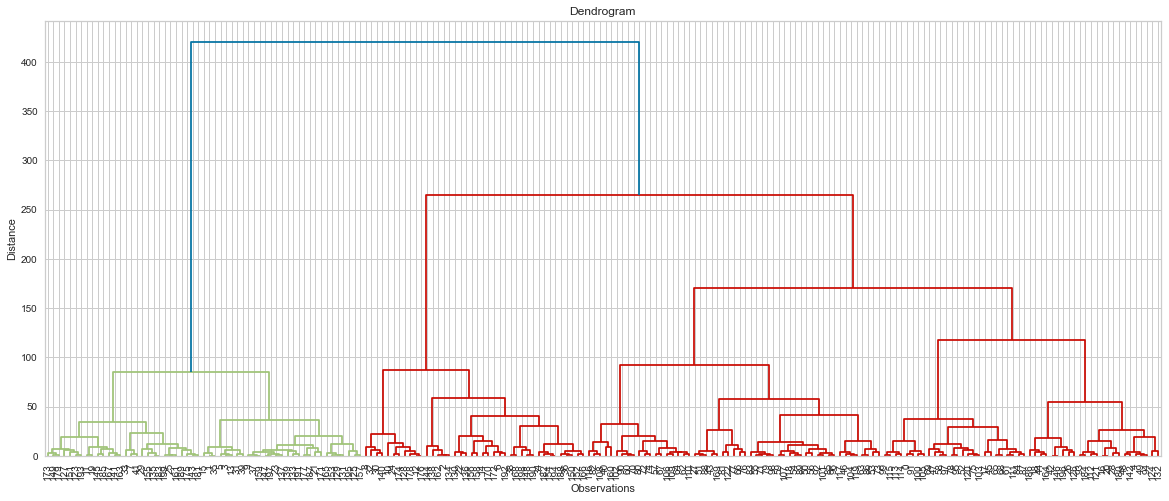

In [142]:
plt.figure(figsize = (20,8))
plt.title("Dendrogram")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, leaf_font_size = 10);  

In [143]:
plt.figure(figsize = (20,12))

plt.subplot(221)
plt.title("Ward")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, leaf_font_size = 10, truncate_mode='lastp', p=10)   # leaf_font_size --> X eksenindeki yazilari buyutmek icin.

plt.subplot(222)
plt.title("Complete")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_complete, leaf_font_size = 10, truncate_mode='lastp', p=10)

plt.subplot(223)
plt.title("Average")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_average, leaf_font_size = 10, truncate_mode='lastp', p=10)

plt.subplot(224)
plt.title("Single")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_single, leaf_font_size = 10, truncate_mode='lastp', p=10);

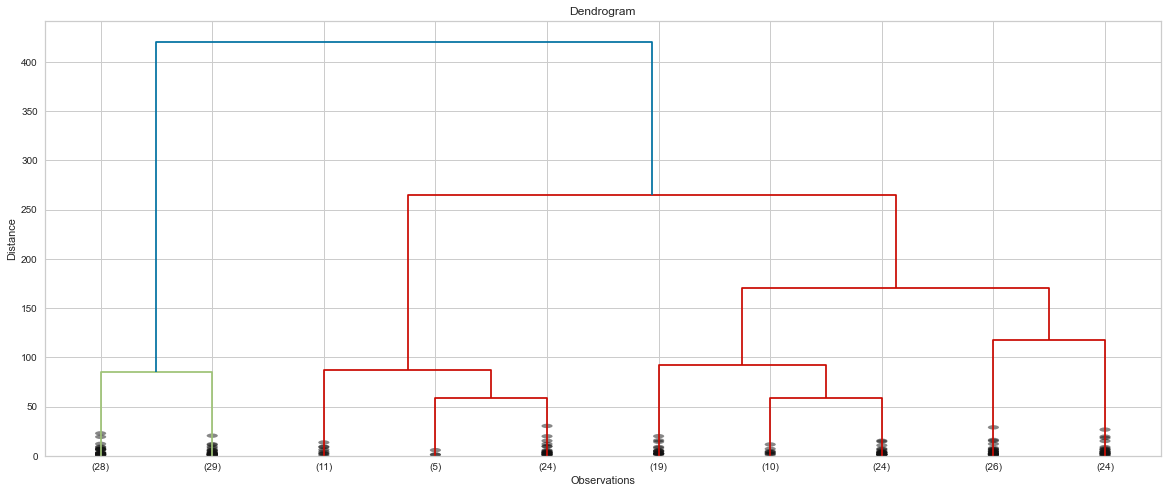

In [144]:
plt.figure(figsize = (20,8))
plt.title("Dendrogram")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, truncate_mode = "lastp", p = 10, show_contracted = True, leaf_font_size = 10);

In [145]:
from sklearn.cluster import AgglomerativeClustering

In [146]:
from sklearn.metrics import silhouette_score
range_n_clusters = range(2,11)
for num_clusters in range_n_clusters:
    # intialise kmeans
    Agg_model = AgglomerativeClustering(n_clusters=num_clusters)
    Agg_model.fit(X1)
    cluster_labels = Agg_model.labels_
    # silhouette score
    silhouette_avg = silhouette_score(X1, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.45437524400798707
For n_clusters=3, the silhouette score is 0.4403939907045589
For n_clusters=4, the silhouette score is 0.4605877438219549
For n_clusters=5, the silhouette score is 0.4039101313348303
For n_clusters=6, the silhouette score is 0.4122277010437696
For n_clusters=7, the silhouette score is 0.4154024433868577
For n_clusters=8, the silhouette score is 0.387772181711837
For n_clusters=9, the silhouette score is 0.39419016298118076
For n_clusters=10, the silhouette score is 0.38799839181574464


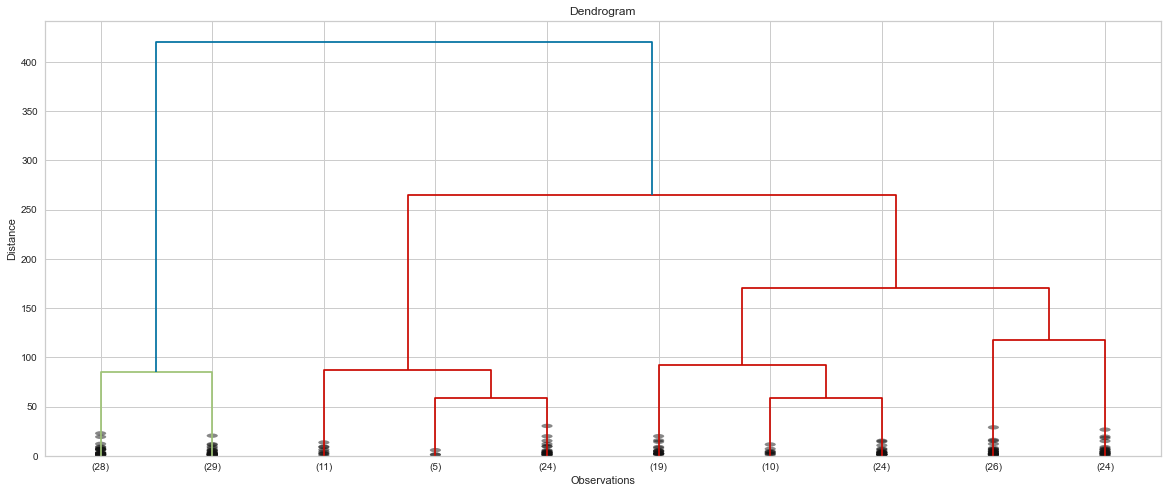

In [147]:
plt.figure(figsize = (20,8))
plt.title("Dendrogram")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, truncate_mode = "lastp", p = 10, show_contracted = True, leaf_font_size = 10);

## Clustering based on Annual Income and Spending Score- x2

In [148]:
X2.head()

Annual Income  Spending Score  cluster_Kmeans
0             15              39               3
1             15              81               4
2             16               6               3
3             16              77               4
4             17              40               3

In [149]:
hopkins(X2, X2.shape[0])   # Kümelemeye uygun

0.2802748222127736

In [150]:
hc_ward = linkage(y = X2, method = "ward")  # Datayi hangi kumeye atarsan varyans en en dusuk olacaksa o kumeye at.
hc_complete = linkage(X2, "complete")       # Kumelerdeki en uzak noktalari bul, bunlar icinde en yakin olana atama yap.
hc_average = linkage(X2, "average")         # Datanin kumenin her elemanina olan uzakliklarinin ortalamasini al, en az olan kumeye ata ata.
hc_single = linkage(X2, "single")  

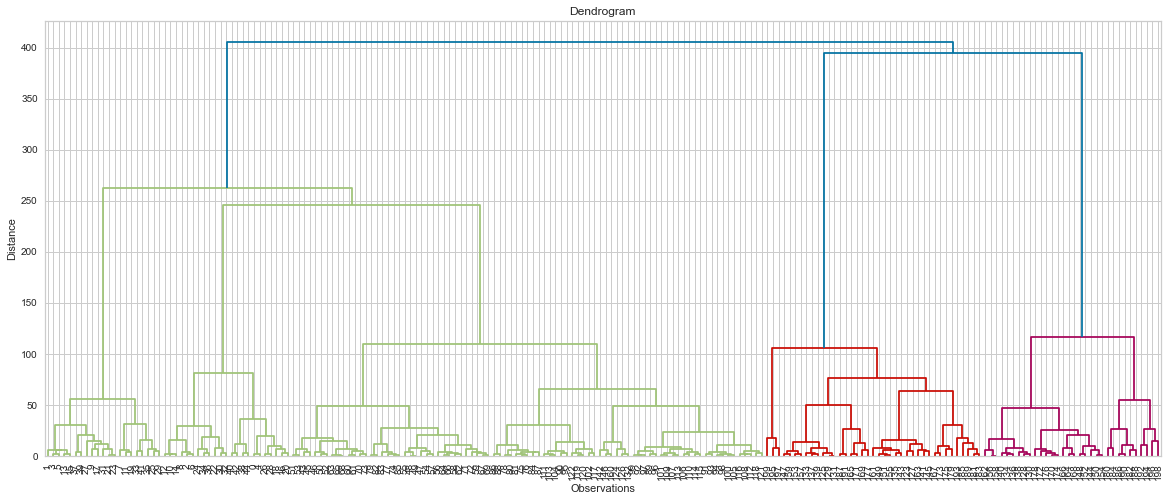

In [151]:
plt.figure(figsize = (20,8))
plt.title("Dendrogram")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, leaf_font_size = 10); 

In [152]:
plt.figure(figsize = (20,12))

plt.subplot(221)
plt.title("Ward")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, leaf_font_size = 10, truncate_mode='lastp', p=10)   # leaf_font_size --> X eksenindeki yazilari buyutmek icin.

plt.subplot(222)
plt.title("Complete")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_complete, leaf_font_size = 10, truncate_mode='lastp', p=10)

plt.subplot(223)
plt.title("Average")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_average, leaf_font_size = 10, truncate_mode='lastp', p=10)

plt.subplot(224)
plt.title("Single")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_single, leaf_font_size = 10, truncate_mode='lastp', p=10);

In [153]:
from sklearn.metrics import silhouette_score
range_n_clusters = range(2,11)
for num_clusters in range_n_clusters:
    # intialise kmeans
    Agg_model = AgglomerativeClustering(n_clusters=num_clusters)
    Agg_model.fit(X2)
    cluster_labels = Agg_model.labels_
    # silhouette score
    silhouette_avg = silhouette_score(X2, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.3652104064897477
For n_clusters=3, the silhouette score is 0.459679813211268
For n_clusters=4, the silhouette score is 0.4890277954086271
For n_clusters=5, the silhouette score is 0.5493385782886369
For n_clusters=6, the silhouette score is 0.5359681525929858
For n_clusters=7, the silhouette score is 0.4423028495726119
For n_clusters=8, the silhouette score is 0.44278990889572045
For n_clusters=9, the silhouette score is 0.4487869260743358
For n_clusters=10, the silhouette score is 0.4329617022138801


### ii. *Apply Agglomerative Clustering*

#### Age and Spending Score- x1

In [154]:
model1 = AgglomerativeClustering(n_clusters=4, affinity = "euclidean", linkage = "ward")
agg_clus = model1.fit_predict(X1)

In [155]:
X1["cluster_agg"] = agg_clus
X1.head()

Age  Spending Score  cluster_Kmeans  cluster_agg
0   19              39               3            0
1   21              81               2            3
2   20               6               1            2
3   23              77               2            3
4   31              40               3            0

#### Annual Income and Spending Score- x2

In [156]:
model2 = AgglomerativeClustering(n_clusters=5, affinity = "euclidean", linkage = "ward")
agg_clus_2 = model2.fit_predict(X2)

In [157]:
X2["cluster_agg"] = agg_clus_2
X2.head()

Annual Income  Spending Score  cluster_Kmeans  cluster_agg
0             15              39               3            4
1             15              81               4            3
2             16               6               3            4
3             16              77               4            3
4             17              40               3            4

### iii. *Visualizing and Labeling All the Clusters* 

#### Age and Spending Score- x1

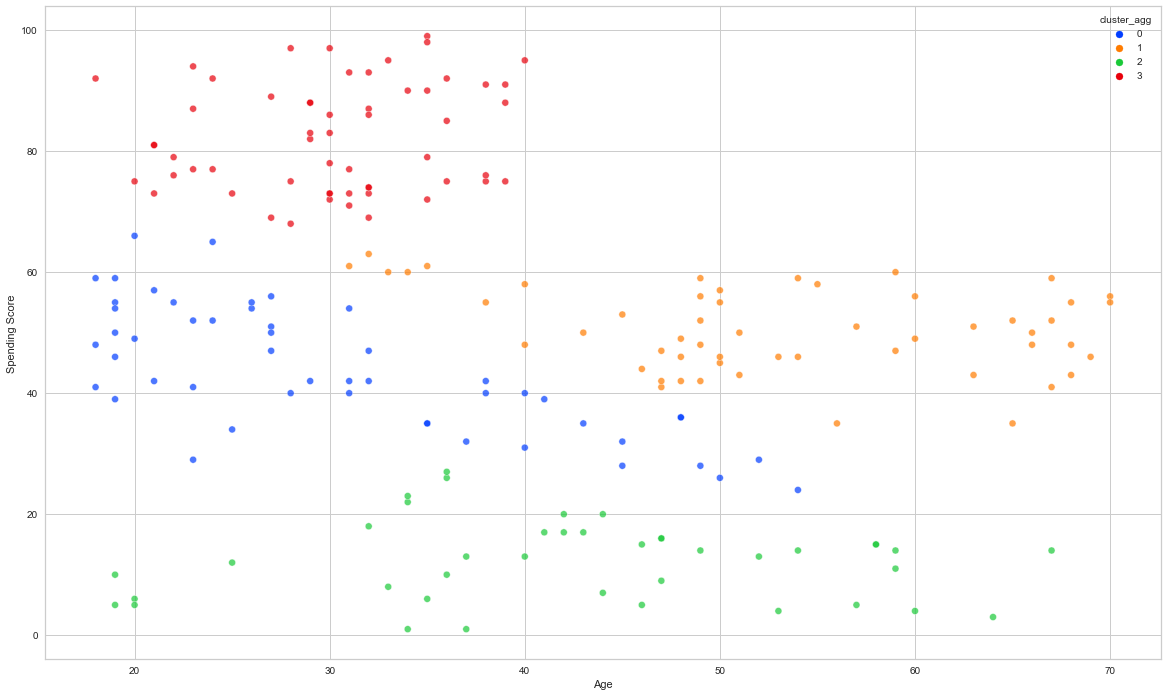

In [185]:
plt.figure(figsize = (20,12))
sns.scatterplot(x ="Age", y= "Spending Score", data=X1, hue='cluster_agg',palette="bright", alpha =0.7);

#### Annual Income and Spending Score- x2

In [159]:
plt.figure(figsize = (20,12))
sns.scatterplot(x ="Annual Income", y= "Spending Score", data=X2, hue='cluster_agg',palette="bright", alpha =0.7);

#### Interpretation based on Age and Spending Score- x1

In [160]:
X1.head()

Age  Spending Score  cluster_Kmeans  cluster_agg
0   19              39               3            0
1   21              81               2            3
2   20               6               1            2
3   23              77               2            3
4   31              40               3            0

In [161]:
X1.groupby("cluster_Kmeans").describe()

Age                                                      Spending Score                                                     cluster_agg                                             
               count       mean        std   min    25%   50%   75%   max          count       mean       std   min    25%   50%   75%   max       count      mean       std  min  25%  50%  75%  max
cluster_Kmeans                                                                                                                                                                                       
0               48.0  55.708333   8.557585  43.0  48.75  53.5  65.0  70.0           48.0  48.229167  6.922795  35.0  43.00  48.0  53.5  60.0        48.0  0.937500  0.244623  0.0  1.0  1.0  1.0  1.0
1               48.0  43.291667  11.761745  19.0  36.00  44.0  52.0  67.0           48.0  15.020833  8.753090   1.0   7.75  14.0  20.5  32.0        48.0  1.666667  0.753244  0.0  2.0  2.0  2.0  2.0
2               57.0  30.175439   5.535995  18.0  27.00  30.0  35.0  40.0           57.0  82.350877  8.913255  68.0  75.00  81.0  90.0  99.0        57.0  3.000000  0.000000  3.0  3.0  3.0  3.0  3.0
3               47.0  27.617021   7.167418  18.0  21.00  27.0  32.5  41.0           47.0  49.148936  9.136593  29.0  41.50  50.0  55.5  66.0        47.0  0.170213  0.379883  0.0  0.0  0.0  0.0  1.0

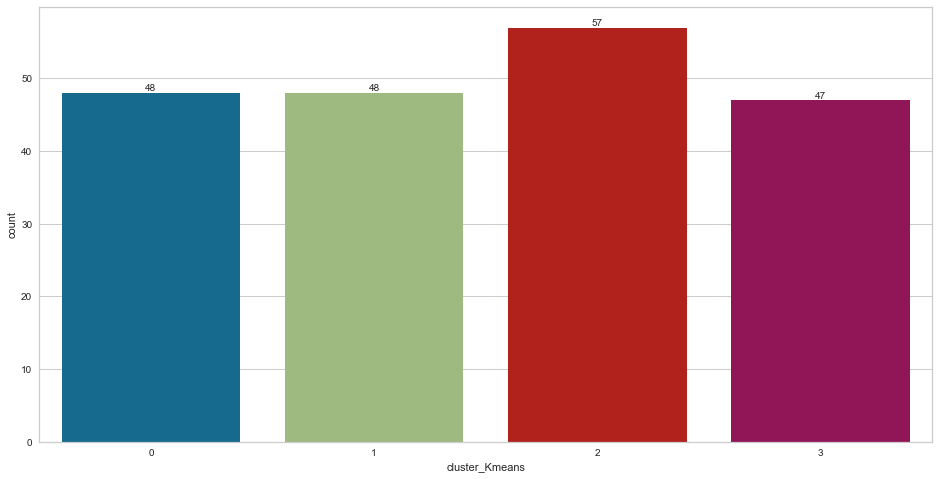

In [162]:
plt.figure(figsize=(16,8))
ax = sns.countplot(data=X1, x="cluster_Kmeans")
ax.bar_label(ax.containers[0]);

### Conclusion

**cluster 0** : The average age is around 55, both annula_income and spending_scores are on average. 
It should be researched what can be done to direct to more spending.

**cluster 1**: The average age is around 45, the annula_income is high but the spending_scores are very low. 
This group is our target audience and specific strategies should be developed to drive this group to spend.

**cluster 2** :The average age is around 30. The annula_income is high and spending_scores are very high. 
This group consists of our loyal customers. Our company derives the main profit from this group. Very 
special promotions can be made in order not to miss it.    
    
**cluster 3**: The average age is around 25.both annula_income and spending_scores are on average. 
It should be researched what can be done to direct to more spending.

#### Interpretation based on Annual Income and Spending Score- x2

In [163]:
X2.head()

Annual Income  Spending Score  cluster_Kmeans  cluster_agg
0             15              39               3            4
1             15              81               4            3
2             16               6               3            4
3             16              77               4            3
4             17              40               3            4

In [164]:
X2.groupby("cluster_Kmeans").describe()

Annual Income                                                           Spending Score                                                       cluster_agg                                             
                       count        mean        std   min    25%    50%     75%    max          count       mean        std   min    25%   50%    75%   max       count      mean       std  min  25%  50%  75%  max
cluster_Kmeans                                                                                                                                                                                                      
0                       22.0   80.181818   6.396698  71.0  75.50   78.0   86.75   93.0           22.0  12.681818   7.325015   1.0   7.50  12.5  16.75  27.0        22.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0
1                       44.0   47.659091   5.598767  39.0  43.00   48.0   54.00   58.0           44.0  51.613636   6.387546  36.0  47.00  52.0  56.00  65.0        44.0  1.068182  0.452267  1.0  1.0  1.0  1.0  4.0
2                       29.0   78.551724   6.522413  69.0  73.00   78.0   85.00   93.0           29.0  82.172414   9.498379  63.0  75.00  83.0  90.00  97.0        29.0  2.000000  0.000000  2.0  2.0  2.0  2.0  2.0
3                       22.0   25.727273   7.566731  15.0  19.25   24.5   32.25   39.0           22.0  20.227273  12.891237   3.0   7.75  16.0  31.75  40.0        22.0  4.000000  0.000000  4.0  4.0  4.0  4.0  4.0
4                       21.0   25.095238   7.133756  15.0  19.00   24.0   30.00   38.0           21.0  80.047619  10.249274  61.0  73.00  77.0  87.00  99.0        21.0  3.000000  0.000000  3.0  3.0  3.0  3.0  3.0
5                       10.0  109.700000  13.768321  97.0  99.50  103.0  118.25  137.0           10.0  22.000000   9.140873   8.0  16.25  20.5  27.00  39.0        10.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0
6                       42.0   63.952381   5.369073  54.0  60.25   63.0   66.50   79.0           42.0  46.214286   7.396557  29.0  41.25  46.0  51.50  59.0        42.0  1.000000  0.000000  1.0  1.0  1.0  1.0  1.0
7                       10.0  109.700000  13.768321  97.0  99.50  103.0  118.25  137.0           10.0  82.000000   9.463380  68.0  75.25  84.0  87.50  97.0        10.0  2.000000  0.000000  2.0  2.0  2.0  2.0  2.0

In [173]:
plt.figure(figsize=(16,8))
ax = sns.countplot(data=X2, x="cluster_Kmeans", palette="Set1")
ax.bar_label(ax.containers[0]);

## Conclusion

### Female

**cluster 0** : The average age is around 40, both annula_income and spending_scores are on average. 
It should be researched what can be done to direct more spending.

**cluster 1**: The average age is around 45, the annula_income is very high but the spending_scores is low.
This group is our target audience and special strategies need to be developed for this group.    

**cluster 2** :The average age is around 45. Both annula_income and spending_scores are low. It can be 
directed to shopping with gift certificates.

**cluster 3**: The average age is around 25. Low annual_incomes but very high spending scores. This 
group does a lot of shopping, but they do not bring much profit.

**cluster 4**: The average age is around 30, the annual income and the spending_score
is very high. This group consists of our loyal customers. Our company derives the main profit from this group. 
Very special promotions can be made in order not to miss it.

### Male

**cluster 0** : The average age is around 45, both annula_income and spending_scores are on average. 
It should be researched what can be done to direct more spending.

**cluster 1**: The average age is around 40, the annula_income is very high but the spending_scores is very low.
This group is our target audience and special strategies need to be developed for this group.    

**cluster 2** :The average age is around 50. Both annula_income and spending_scores are low. It can be 
directed to shopping with gift certificates.

**cluster 3**: The average age is around 25. Low annual_incomes but very high spending scores. This 
group does a lot of shopping, but they do not bring much profit.

**cluster 4**: The average age is around 30, the annual income and the spending_score
is very high. This group consists of our loyal customers. Our company derives the main profit from this group. 
Very special promotions can be made in order not to miss it.

In [166]:
df

Gender  Age  Annual Income  Spending Score
0      Male   19             15              39
1      Male   21             15              81
2    Female   20             16               6
3    Female   23             16              77
4    Female   31             17              40
5    Female   22             17              76
6    Female   35             18               6
7    Female   23             18              94
8      Male   64             19               3
9    Female   30             19              72
10     Male   67             19              14
11   Female   35             19              99
12   Female   58             20              15
13   Female   24             20              77
14     Male   37             20              13
15     Male   22             20              79
16   Female   35             21              35
17     Male   20             21              66
18     Male   52             23              29
19   Female   35             23              98
20     Male   35             24              35
21     Male   25             24              73
22   Female   46             25               5
23     Male   31             25              73
24   Female   54             28              14
25     Male   29             28              82
26   Female   45             28              32
27     Male   35             28              61
28   Female   40             29              31
29   Female   23             29              87
30     Male   60             30               4
31   Female   21             30              73
32     Male   53             33               4
33     Male   18             33              92
34   Female   49             33              14
35   Female   21             33              81
36   Female   42             34              17
37   Female   30             34              73
38   Female   36             37              26
39   Female   20             37              75
40   Female   65             38              35
41     Male   24             38              92
42     Male   48             39              36
43   Female   31             39              61
44   Female   49             39              28
45   Female   24             39              65
46   Female   50             40              55
47   Female   27             40              47
48   Female   29             40              42
49   Female   31             40              42
50   Female   49             42              52
51     Male   33             42              60
52   Female   31             43              54
53     Male   59             43              60
54   Female   50             43              45
55     Male   47             43              41
56   Female   51             44              50
57     Male   69             44              46
58   Female   27             46              51
59     Male   53             46              46
60     Male   70             46              56
61     Male   19             46              55
62   Female   67             47              52
63   Female   54             47              59
64     Male   63             48              51
65     Male   18             48              59
66   Female   43             48              50
67   Female   68             48              48
68     Male   19             48              59
69   Female   32             48              47
70     Male   70             49              55
71   Female   47             49              42
72   Female   60             50              49
73   Female   60             50              56
74     Male   59             54              47
75     Male   26             54              54
76   Female   45             54              53
77     Male   40             54              48
78   Female   23             54              52
79   Female   49             54              42
80     Male   57             54              51
81     Male   38             54              55
82     Male   67     

In [167]:
df.groupby("Gender").describe()

Age                                                      Annual Income                                                        Spending Score                                                  
        count       mean        std   min    25%   50%   75%   max         count       mean        std   min    25%   50%    75%    max          count       mean       std  min   25%   50%   75%   max
Gender                                                                                                                                                                                                  
Female  112.0  38.098214  12.644095  18.0  29.00  35.0  47.5  68.0         112.0  59.250000  26.011952  16.0  39.75  60.0  77.25  126.0          112.0  51.526786  24.11495  5.0  35.0  50.0  73.0  99.0
Male     88.0  39.806818  15.514812  18.0  27.75  37.0  50.5  70.0          88.0  62.227273  26.638373  15.0  45.50  62.5  78.00  137.0           88.0  48.511364  27.89677  1.0  24.5  50.0  70.0  97.0

In [168]:
df["cluster_Annual_Income_Spending_Score"] = X1.cluster_Kmeans
df.head()

Gender  Age  Annual Income  Spending Score  cluster_Annual_Income_Spending_Score
0    Male   19             15              39                                     3
1    Male   21             15              81                                     2
2  Female   20             16               6                                     1
3  Female   23             16              77                                     2
4  Female   31             17              40                                     3

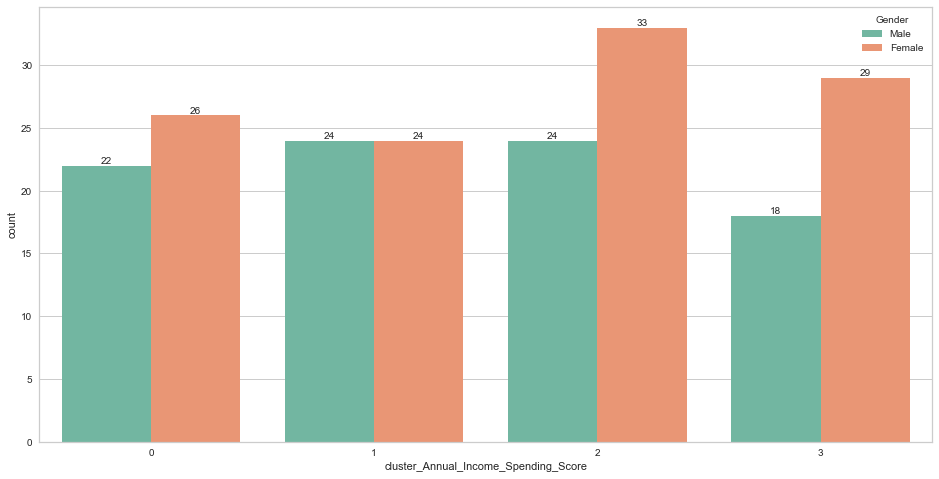

In [175]:
plt.figure(figsize=(16,8))
ax = sns.countplot(data=df,x = "cluster_Annual_Income_Spending_Score", hue ="Gender",palette="Set2")
for container in ax.containers:
    ax.bar_label(container)

In [170]:
plt.figure(figsize=(10,8))
explode = [0,0,0,0]
plt.pie(df['cluster_Annual_Income_Spending_Score'].value_counts(), explode=explode,autopct='%1.1f%%', shadow=True,startangle=140);
plt.title("Percentile of cluster_Annual_Income_Spending_Score")
plt.legend(labels=[0,1,2,3]);

**cluster 0** : The average age is around 40, both annula_income and spending_scores are on average. 
It should be researched what can be done to direct more spending.

**cluster 1**: The average age is around 30, both annula_income and spending_scores are very high. 
This group consists of our loyal customers. Our company derives the main profit from this group. Very 
special promotions can be made in order not to miss it.

**cluster 2** :The average age is around 45. Both annula_income and spending_scores are low. It can be 
directed to shopping with gift certificates.

**cluster 3**: The average age is around 25. Low annual_incomes but very high spending scores. This 
group does a lot of shopping, but they do not bring much profit.

**cluster 4**: The average age is around 40, their annual income is very high but their spending_score
is very low. This group is our target audience and special strategies need to be developed for this 
group.

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___